In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import accuracy_score,classification_report
from tqdm.notebook import tqdm
import random
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv("fashion-mnist_train.csv")
test_data = pd.read_csv("fashion-mnist_test.csv")

In [3]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
x_train = train_data.drop(columns='label').to_numpy()
y_train = train_data['label'].to_numpy()

x_test = test_data.drop(columns='label').to_numpy()
y_test = test_data['label'].to_numpy()

In [5]:
x_train = x_train.reshape(x_train.shape[0],28,28,1).astype('float32') / 255.0
x_test = x_test.reshape(x_test.shape[0],28,28,1).astype('float32') / 255.0

In [6]:
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes = 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes = 10)

In [7]:
print("x_train shape:", x_train.shape)
print("y_train_cat shape:", y_train_cat.shape)
print("x_test shape:", x_test.shape)
print("y_test_cat shape:", y_test_cat.shape)

x_train shape: (60000, 28, 28, 1)
y_train_cat shape: (60000, 10)
x_test shape: (10000, 28, 28, 1)
y_test_cat shape: (10000, 10)


In [8]:
class_names = ['T-shirt/Top','Trouser', 'Pullover','Dress','Coat', 'Sandal', 'Shirt','Sneaker', 'Bag', 'Ankle Boot']

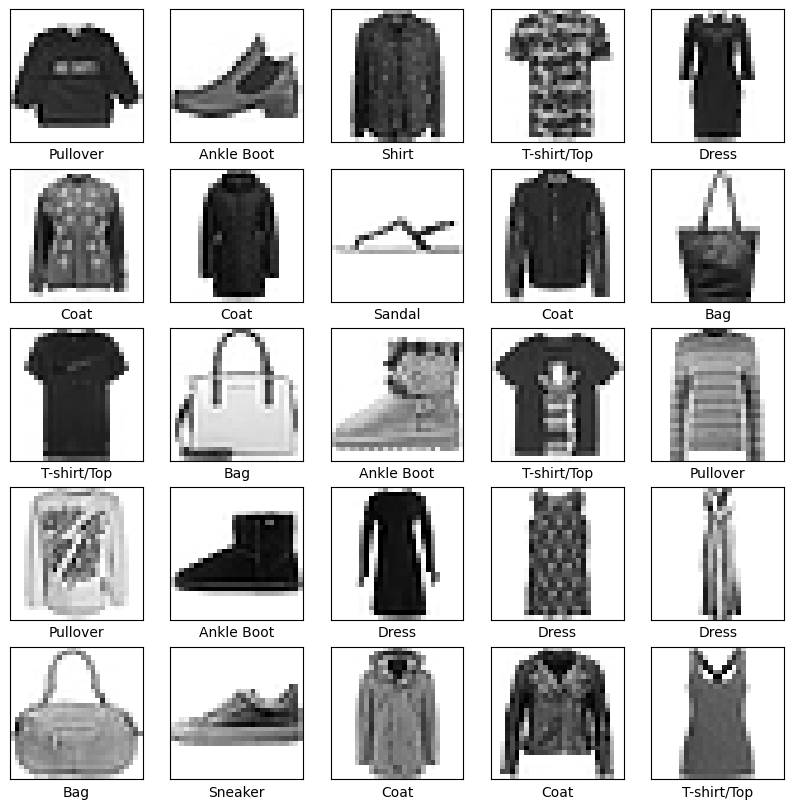

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), input_shape=(28,28,1), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

In [13]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         100,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 120,170 (469.41 KB)

 Trainable params: 120,170 (469.41 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(x_train,y_train_cat, epochs = 10 , batch_size=64, validation_data = (x_test,y_test_cat))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.7664 - loss: 0.6561 - val_accuracy: 0.8851 - val_loss: 0.3254
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.8862 - loss: 0.3187 - val_accuracy: 0.9028 - val_loss: 0.2782
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9052 - loss: 0.2681 - val_accuracy: 0.9060 - val_loss: 0.2577
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9166 - loss: 0.2335 - val_accuracy: 0.9119 - val_loss: 0.2348
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9220 - loss: 0.2126 - val_accuracy: 0.9161 - val_loss: 0.2316
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9295 - loss: 0.1947 - val_accuracy: 0.9191 - val_loss: 0.2243
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9350 - loss: 0.1754 - val_accuracy: 0.9231 - val_loss: 0.2082
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9403 - loss: 0.1635 - 

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         100,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 360,512 (1.38 MB)

 Trainable params: 120,170 (469.41 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 240,342 (938.84 KB)

In [16]:
model.evaluate(x_test,y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9224 - loss: 0.2296


[0.23134048283100128, 0.9225999712944031]

In [21]:
predictions = model.predict(x_test)
predictions = tf.argmax(predictions, axis=1)
y_test = tf.argmax(y_test_cat, axis=1)
print("Accuracy : ", accuracy_score(y_test,predictions))
print("Classification Report : ", classification_report(y_test,predictions))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Accuracy :  0.9226
Classification Report :                precision    recall  f1-score   support

           0       0.83      0.91      0.87      1000
           1       0.97      1.00      0.98      1000
           2       0.91      0.84      0.87      1000
           3       0.96      0.89      0.93      1000
           4       0.87      0.92      0.89      1000
           5       0.99      0.97      0.98      1000
           6       0.79      0.77      0.78      1000
           7       0.96      0.97      0.96      1000
           8       0.99      0.98      0.99      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


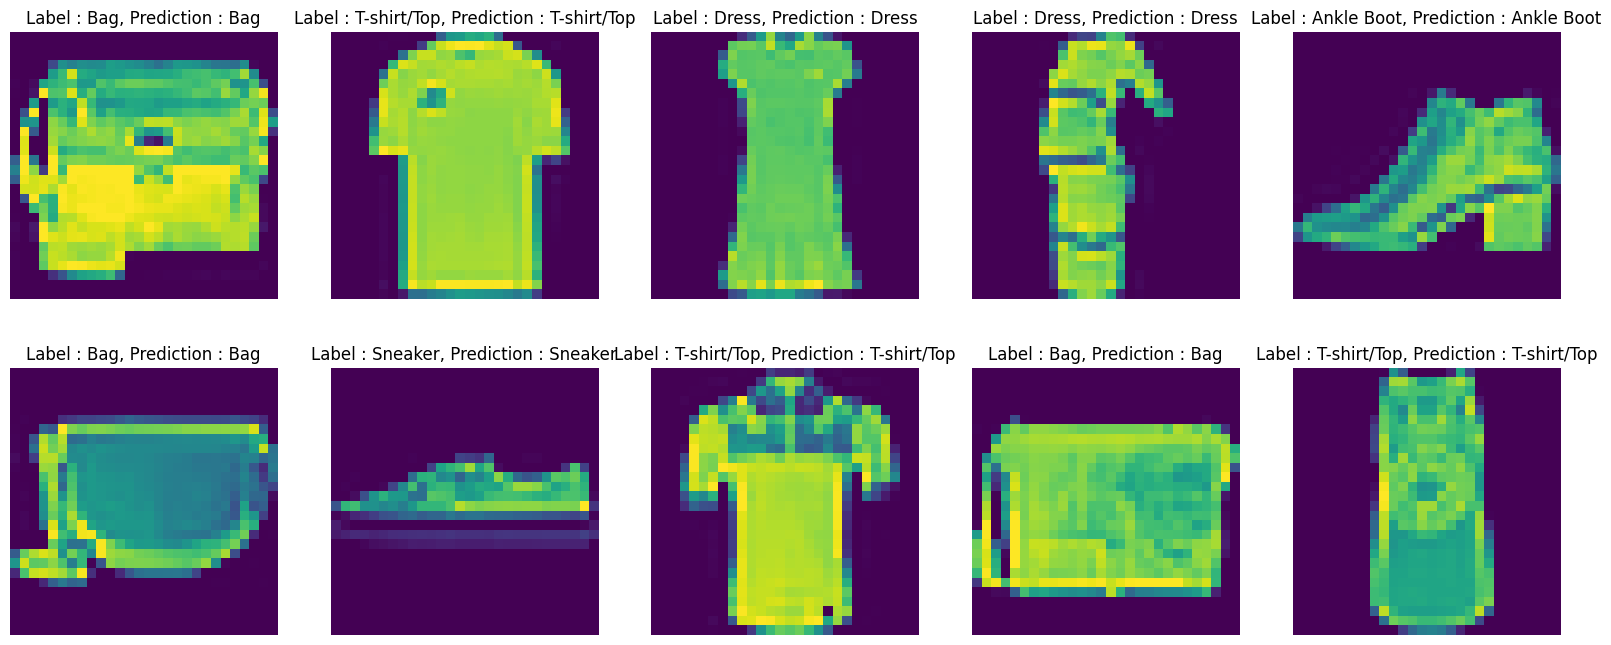

In [23]:
images = []
labels = [] 
random_indices = random.sample(range(len(x_test)), 10)
for i in random_indices:
    images.append(x_test[i])
    labels.append(y_test_cat[i])
images = np.array(images)
labels = np.array(labels)
fig = plt.figure(figsize=(20,8))
rows = 2
cols = 5
x = 1
for image,label in zip(images,labels):
    fig.add_subplot(rows,cols,x)
    prediction = model.predict(tf.expand_dims(image, axis=0))
    prediction = class_names[tf.argmax(prediction.flatten())]
    label = class_names[tf.argmax(label)]
    plt.title(f"Label : {label}, Prediction : {prediction}")
    plt.imshow(image/255.0)
    plt.axis("off")
    x+=1